# Практическая работа №5 
## Тема: «Логистическая регрессия»
### Выполнила студентка: Рахимова Алсу ПКТб-21-1
#### ВАРИАНТ: (ваш dataset [название, ссылка])


# Практическая работа №5 
## Тема: «Логистическая регрессия»
### Выполнила студентка: Рахимова Алсу ПКТб-21-1
#### ВАРИАНТ: (ваш dataset [название, ссылка])


В контексте машинного обучения, логистическая регрессия часто используется для бинарной классификации, где цель состоит в том, чтобы предсказать, к какой из двух групп относится объект.

Пример Применения Логистической Регрессии на Датасете Титаник Для примера применения логистической регрессии на датасете Титаник, мы можем попытаться предсказать, выживет ли пассажир на Титанике на основе таких признаков, как пол, возраст, класс пассажира и другие.

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.to_excel('titanic.xlsx')

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
# Загрузка данных
#data = pd.read_csv('titanic.csv')

# Загрузка датасета
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Обработка пропущенных значений
#data = data.dropna()
data.Age = data.Age.fillna(data.Age.mean())

# Выбор признаков
features = data[['Pclass', 'Age', 'Sex']]
target = data['Survived']

In [3]:
features

,Pclass,Age,Sex
0,3,22.000000,male
1,1,38.000000,female
2,3,26.000000,female
3,1,35.000000,female
4,3,35.000000,male
...,...,...,...
886,2,27.000000,male
887,1,19.000000,female
888,3,29.699118,female
889,1,26.000000,male


<Axes: >

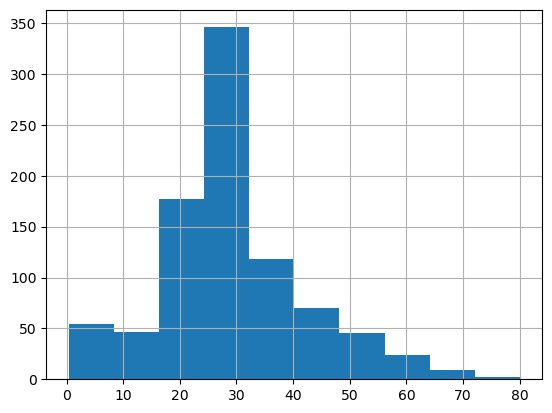

In [4]:
features.Age.hist()

In [5]:
gender_mapping = {'male': 0, 'female': 1}

#features = features['Sex'].replace(gender_mapping)
features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})

C:\Users\alsy2\AppData\Local\Temp\ipykernel_19744\2431505523.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Sex'] = features['Sex'].map({'male': 0, 'female': 1})


In [6]:
features

,Pclass,Age,Sex
0,3,22.000000,0
1,1,38.000000,1
2,3,26.000000,1
3,1,35.000000,1
4,3,35.000000,0
...,...,...,...
886,2,27.000000,0
887,1,19.000000,1
888,3,29.699118,1
889,1,26.000000,0


In [8]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Стандартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Создание и обучение модели
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [10]:
# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Этот пример демонстрирует базовый процесс применения логистической регрессии для бинарной классификации на датасете Титаник. Важно отметить, что выбор признаков и их преобразование могут сильно влиять на результаты модели, поэтому важно проводить эксперименты с различными наборами признаков и методами их обработки.

**Задача**

Определить с какой вероятностью выживет пассажир возрастом 25 лет

Для решения этой задачи мы будем использовать библиотеку pandas для работы с данными, numpy для математических операций, и sklearn для построения и оценки модели логистической регрессии. В качестве примера датасета мы будем использовать датасет Titanic, который доступен в библиотеке seaborn.

Установка необходимых библиотек: 

Если у вас еще не установлены необходимые библиотеки, вы можете установить их с помощью команды pip install pandas numpy seaborn sklearn.

Загрузка и подготовка данных: Загрузим датасет Titanic, отфильтруем его, чтобы оставить только пассажиров возрастом 25 лет, и подготовим данные для обучения модели.
Построение и обучение модели: Используем логистическую регрессию из sklearn для обучения модели на подготовленных данных.
Оценка модели: Оценим качество модели, используя тестовые данные.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Загрузка датасета Titanic
titanic = sns.load_dataset('titanic')

# Фильтрация данных для пассажиров возрастом 25 лет
titanic_25 = titanic[titanic['age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X = titanic_25[['pclass', 'sex', 'embarked']].dropna()
y = titanic_25['survived']

# Преобразование категориальных переменных в числовые
X['sex'] = X['sex'].map({'male': 0, 'female': 1})
X['embarked'] = X['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (выживет с вероятносью:): {accuracy}")


Accuracy (выживет с вероятносью:): 0.8


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')


from sklearn.metrics import classification_report, confusion_matrix

# Загрузка датасета Titanic
titanic = sns.load_dataset('titanic')

# Фильтрация данных для пассажиров возрастом 25 лет
titanic_25 = titanic[titanic['age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X = titanic_25[['pclass', 'sex', 'embarked', 'fare']].dropna()
y = titanic_25['survived']

# Преобразование категориальных переменных в числовые
X['sex'] = X['sex'].map({'male': 0, 'female': 1})
X['embarked'] = X['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
#X['alone'] = X['alone'].map({False: 0, True: 1})

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



#### Задание 1. Загрузить данные из dataset "Титаник" 

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')


from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

url='https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data=pd.read_csv(url)
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Задание 2. Произвести предобработку данных dataset "Титаник" и сохранить результаты каждый в отдельный датафрейм
1. Удалить все пустые значения и сохранить результаты в датафрейм df_del
2. Замена на конкретное значение всех пустых и сохранить результаты в датафрейм df_num
3. Заменить все пустые значения на среднее значение и сохранить результаты в датафрейм df_means
4. Заменить все пустые значения на медианное значение и сохранить результаты в датафрейм df_medians
5. Замена на предыдущее или следующее значение и сохранить результаты в датафрейм df_fb_fill

In [6]:
#1.Удалить все пустые значения и сохранить результаты в датафрейм df_del
df_del = titanic_data.dropna()
df_del

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [7]:
#2. Замена на конкретное значение всех пустых и сохранить результаты в датафрейм df_num
df_num = titanic_data.fillna(24)
df_num

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,24,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,24,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,24,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,24,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,24,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
#3. Заменить все пустые значения на среднее значение и сохранить результаты в датафрейм df_means
df_means = titanic_data.fillna(titanic_data.Fare.mean())
df_means

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,32.204208,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,32.204208,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,32.204208,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,32.204208,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,32.204208,1,2,W./C. 6607,23.4500,32.204208,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [9]:
#4. Заменить все пустые значения на медианное значение и сохранить результаты в датафрейм df_medians
df_medians = titanic_data.fillna(titanic_data.Fare.median())
df_medians

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,14.4542,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,14.4542,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,14.4542,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0000,0,0,211536,13.0000,14.4542,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,14.4542,1,2,W./C. 6607,23.4500,14.4542,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.0000,C148,C


In [10]:
#5. Замена на предыдущее или следующее значение и сохранить результаты в датафрейм df_fb_fill
df_fb_fill = titanic_data.fillna(method  = 'ffill')
df_fb_fill

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C50,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Задание 3. Применить к каждому датафрейму алгоритм логистической регрессии

In [68]:
#df_del
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для пассажиров возрастом 25 лет
df_del_25 = df_del[df_del['Age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X = df_del_25[['Pclass', 'Sex', 'Embarked']]
y = df_del_25['Survived']

# Преобразование категориальных переменных в числовые
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})
X['Embarked'] = X['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

In [69]:
#df_num
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для пассажиров возрастом 25 лет
df_num_25 = df_num[df_num['Age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X1 = df_num_25[['Pclass', 'Sex', 'Embarked']]
y1 = df_num_25['Survived']

# Преобразование категориальных переменных в числовые
X1['Sex'] = X1['Sex'].map({'male': 0, 'female': 1})
X1['Embarked'] = X1['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X1_train, y1_train)

# Предсказание на тестовых данных
y1_pred = model.predict(X1_test)


In [60]:
#df_fb_fill
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для пассажиров возрастом 25 лет
df_fb_fill_25 = df_fb_fill[df_fb_fill['Age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X2 = df_fb_fill_25[['Pclass', 'Sex', 'Embarked']]
y2 = df_fb_fill_25['Survived']

# Преобразование категориальных переменных в числовые
X2['Sex'] = X2['Sex'].map({'male': 0, 'female': 1})
X2['Embarked'] = X2['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X2_train, y2_train)

# Предсказание на тестовых данных
y2_pred = model.predict(X2_test)


In [70]:
#df_means
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для пассажиров возрастом 25 лет
df_means_25 = df_means[df_means['Age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X3 = df_means_25[['Pclass', 'Sex', 'Embarked']]
y3 = df_means_25['Survived']

# Преобразование категориальных переменных в числовые
X3['Sex'] = X3['Sex'].map({'male': 0, 'female': 1})
X3['Embarked'] = X3['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X3_train, y3_train)

# Предсказание на тестовых данных
y3_pred = model.predict(X3_test)

In [71]:
#df_medians
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для пассажиров возрастом 25 лет
df_medians_25 = df_medians[df_medians['Age'] == 25]

# Подготовка данных: выбор признаков и целевой переменной
X4 = df_medians_25[['Pclass', 'Sex', 'Embarked']]
y4 = df_medians_25['Survived']

# Преобразование категориальных переменных в числовые
X4['Sex'] = X4['Sex'].map({'male': 0, 'female': 1})
X4['Embarked'] = X4['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Разделение данных на обучающую и тестовую выборки
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X4_train, y4_train)

# Предсказание на тестовых данных
y4_pred = model.predict(X4_test)

#### Задание 4. Произвести оценку обученности модели разными метриками
1. accuracy
2. recall
3. Precision 
4. F1-Score

In [72]:
# Оценка модели df_del
accuracy_df_del = accuracy_score(y_test, y_pred)
print(f"Accuracy (выживет с вероятносью:): {accuracy_df_del}")
print(classification_report(y_test, y_pred))

Accuracy (выживет с вероятносью:): 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



In [73]:
# Оценка модели df_num
accuracy_df_num = accuracy_score(y1_test, y1_pred)
print(f"Accuracy (выживет с вероятносью:): {accuracy_df_num}")
print(classification_report(y1_test, y1_pred))

Accuracy (выживет с вероятносью:): 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



In [74]:
# Оценка модели df_fb_fill
accuracy_df_fb_fill = accuracy_score(y2_test, y2_pred)
print(f"Accuracy (выживет с вероятносью:): {accuracy_df_fb_fill}")
print(classification_report(y2_test, y2_pred))

Accuracy (выживет с вероятносью:): 0.8333333333333334
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6



In [75]:
# Оценка модели df_means
accuracy_df_means = accuracy_score(y3_test, y3_pred)
print(f"Accuracy (выживет с вероятносью:): {accuracy_df_means}")
print(classification_report(y3_test, y3_pred))

Accuracy (выживет с вероятносью:): 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



In [76]:
# Оценка модели df_medians
accuracy_df_medians = accuracy_score(y4_test, y4_pred)
print(f"Accuracy (выживет с вероятносью:): {accuracy_df_medians}")
print(classification_report(y4_test, y4_pred))

Accuracy (выживет с вероятносью:): 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



#### Задание 5. Определить наиболее эффективную метрику


In [77]:
for i in range (1,5):
    max = 0
    if accuracy_df_del>max:
        max = accuracy_df_del
    if accuracy_df_num>max:
        max = accuracy_df_num
    if accuracy_df_means>max:
        max = accuracy_df_means
    if accuracy_df_medians>max:
        max = accuracy_df_medians
    if accuracy_df_fb_fill>max:
        max = accuracy_df_fb_fill
print(f'Самая эффективная метрика df_fb_fill с веротяностью {max}')

Самая эффективная метрика df_fb_fill с веротяностью 0.8333333333333334


#### Задание 6. Загрузить ваш dataset и произвести его описание



Экспертный рейтинг более 14000 шоколадных батончиков. В нём указаны компания-производитель, конкретное происхождение бобов либо название батончика, количество отданных голосов за конкретную марку, год проведения опроса, процент содержания какао, местонахождение компании-производителя, рейтинг от 1 до 5 и тип какао-бобов.

In [78]:
import pandas as pd
mydf=pd.read_excel('ChocolateBarRatings.xlsx',sheet_name='flavors_of_cacao')
mydf

,Company (Maker-if known),Specific Bean Originor Bar Name,REF,ReviewDate,Cocoa Percent,CompanyLocation,Rating,BeanType,Broad BeanOrigin,SMT
0,A. Morin,Agua Grande,1876.0,NaN,0.63,France,3.75,Criollo,Sao Tome,0
1,A. Morin,Kpime,1676.0,2015.0,0.7,France,2.75,Criollo,Togo,1
2,A. Morin,Atsane,NaN,2015.0,0.7,France,NaN,Criollo,Togo,1
3,A. Morin,Akata,NaN,NaN,0.7,France,3.00,Criollo,Togo,0
4,A. Morin,Quilla,1704.0,NaN,0.7,France,NaN,Criollo,Peru,0
...,...,...,...,...,...,...,...,...,...,...
14355,Zotter,Peru,647.0,2011.0,0.7,Austria,2.00,Criollo,Peru,1
14356,Zotter,Congo,749.0,2011.0,0.65,Austria,3.00,Forastero,Congo,0
14357,Zotter,Kerala State,749.0,2011.0,0.65,Austria,3.50,Forastero,India,0
14358,Zotter,Kerala State,781.0,2011.0,0.62,Austria,2.00,Criollo,India,1


#### Задание 7. Произвести предобработку вашего dataset  и сохранить результаты каждый в отдельный датафрейм
1. Удалить все путые заначения и сохранить результаты в датафрейм mydf_del
2. Замена на конкретное значение все путые  и сохранить результаты в датафрейм mydf_num
3. Заменить все путые заначения на среднее значение и сохранить результаты в датафрейм mydf_means
4. Заменить все путые заначения на медеанные значение и сохранить результаты в датафрейм mydf_medians
5. Замена на предыдущее или следующее значение и сохранить результаты в датафрейм mydf_fb_fill


In [79]:
#1.Удалить все пустые значения и сохранить результаты в датафрейм mydf_del
mydf_del = mydf.dropna()
mydf_del

,Company (Maker-if known),Specific Bean Originor Bar Name,REF,ReviewDate,Cocoa Percent,CompanyLocation,Rating,BeanType,Broad BeanOrigin,SMT
1,A. Morin,Kpime,1676.0,2015.0,0.7,France,2.75,Criollo,Togo,1
5,A. Morin,Carenero,1315.0,2014.0,0.7,France,3.50,Criollo,Venezuela,1
22,A. Morin,Peru,797.0,2012.0,0.63,France,3.00,Criollo,Peru,1
23,Acalli,"Chulucanas, El Platanal",1462.0,2015.0,0.7,U.S.A.,3.50,Criollo,Peru,0
24,Acalli,"Tumbes, Norandino",1470.0,2015.0,0.7,U.S.A.,3.50,Criollo,Peru,0
...,...,...,...,...,...,...,...,...,...,...
14355,Zotter,Peru,647.0,2011.0,0.7,Austria,2.00,Criollo,Peru,1
14356,Zotter,Congo,749.0,2011.0,0.65,Austria,3.00,Forastero,Congo,0
14357,Zotter,Kerala State,749.0,2011.0,0.65,Austria,3.50,Forastero,India,0
14358,Zotter,Kerala State,781.0,2011.0,0.62,Austria,2.00,Criollo,India,1


In [80]:
#2.Замена на конкретное значение всех пустых и сохранить результаты в датафрейм mydf_num
mydf_num = mydf.fillna(7)
mydf_num

,Company (Maker-if known),Specific Bean Originor Bar Name,REF,ReviewDate,Cocoa Percent,CompanyLocation,Rating,BeanType,Broad BeanOrigin,SMT
0,A. Morin,Agua Grande,1876.0,7.0,0.63,France,3.75,Criollo,Sao Tome,0
1,A. Morin,Kpime,1676.0,2015.0,0.7,France,2.75,Criollo,Togo,1
2,A. Morin,Atsane,7.0,2015.0,0.7,France,7.00,Criollo,Togo,1
3,A. Morin,Akata,7.0,7.0,0.7,France,3.00,Criollo,Togo,0
4,A. Morin,Quilla,1704.0,7.0,0.7,France,7.00,Criollo,Peru,0
...,...,...,...,...,...,...,...,...,...,...
14355,Zotter,Peru,647.0,2011.0,0.7,Austria,2.00,Criollo,Peru,1
14356,Zotter,Congo,749.0,2011.0,0.65,Austria,3.00,Forastero,Congo,0
14357,Zotter,Kerala State,749.0,2011.0,0.65,Austria,3.50,Forastero,India,0
14358,Zotter,Kerala State,781.0,2011.0,0.62,Austria,2.00,Criollo,India,1


In [81]:
#3.Заменить все пустые значения на среднее значение и сохранить результаты в датафрейм mydf_means
mydf_means = mydf.fillna(mydf.REF.mean())
mydf_means

,Company (Maker-if known),Specific Bean Originor Bar Name,REF,ReviewDate,Cocoa Percent,CompanyLocation,Rating,BeanType,Broad BeanOrigin,SMT
0,A. Morin,Agua Grande,1876.000000,1035.708441,0.63,France,3.750000,Criollo,Sao Tome,0
1,A. Morin,Kpime,1676.000000,2015.000000,0.7,France,2.750000,Criollo,Togo,1
2,A. Morin,Atsane,1035.708441,2015.000000,0.7,France,1035.708441,Criollo,Togo,1
3,A. Morin,Akata,1035.708441,1035.708441,0.7,France,3.000000,Criollo,Togo,0
4,A. Morin,Quilla,1704.000000,1035.708441,0.7,France,1035.708441,Criollo,Peru,0
...,...,...,...,...,...,...,...,...,...,...
14355,Zotter,Peru,647.000000,2011.000000,0.7,Austria,2.000000,Criollo,Peru,1
14356,Zotter,Congo,749.000000,2011.000000,0.65,Austria,3.000000,Forastero,Congo,0
14357,Zotter,Kerala State,749.000000,2011.000000,0.65,Austria,3.500000,Forastero,India,0
14358,Zotter,Kerala State,781.000000,2011.000000,0.62,Austria,2.000000,Criollo,India,1


In [82]:
#4.Заменить все пустые значения на медианное значение и сохранить результаты в датафрейм mydf_medians
mydf_medians = mydf.fillna(mydf.REF.median())
mydf_medians

,Company (Maker-if known),Specific Bean Originor Bar Name,REF,ReviewDate,Cocoa Percent,CompanyLocation,Rating,BeanType,Broad BeanOrigin,SMT
0,A. Morin,Agua Grande,1876.0,1069.0,0.63,France,3.75,Criollo,Sao Tome,0
1,A. Morin,Kpime,1676.0,2015.0,0.7,France,2.75,Criollo,Togo,1
2,A. Morin,Atsane,1069.0,2015.0,0.7,France,1069.00,Criollo,Togo,1
3,A. Morin,Akata,1069.0,1069.0,0.7,France,3.00,Criollo,Togo,0
4,A. Morin,Quilla,1704.0,1069.0,0.7,France,1069.00,Criollo,Peru,0
...,...,...,...,...,...,...,...,...,...,...
14355,Zotter,Peru,647.0,2011.0,0.7,Austria,2.00,Criollo,Peru,1
14356,Zotter,Congo,749.0,2011.0,0.65,Austria,3.00,Forastero,Congo,0
14357,Zotter,Kerala State,749.0,2011.0,0.65,Austria,3.50,Forastero,India,0
14358,Zotter,Kerala State,781.0,2011.0,0.62,Austria,2.00,Criollo,India,1


In [83]:
#5. Замена на предыдущее или следующее значение и сохранить результаты в датафрейм mydf_fb_fill
mydf_fb_fill = mydf.fillna(method  = 'ffill')
mydf_fb_fill

,Company (Maker-if known),Specific Bean Originor Bar Name,REF,ReviewDate,Cocoa Percent,CompanyLocation,Rating,BeanType,Broad BeanOrigin,SMT
0,A. Morin,Agua Grande,1876.0,NaN,0.63,France,3.75,Criollo,Sao Tome,0
1,A. Morin,Kpime,1676.0,2015.0,0.7,France,2.75,Criollo,Togo,1
2,A. Morin,Atsane,1676.0,2015.0,0.7,France,2.75,Criollo,Togo,1
3,A. Morin,Akata,1676.0,2015.0,0.7,France,3.00,Criollo,Togo,0
4,A. Morin,Quilla,1704.0,2015.0,0.7,France,3.00,Criollo,Peru,0
...,...,...,...,...,...,...,...,...,...,...
14355,Zotter,Peru,647.0,2011.0,0.7,Austria,2.00,Criollo,Peru,1
14356,Zotter,Congo,749.0,2011.0,0.65,Austria,3.00,Forastero,Congo,0
14357,Zotter,Kerala State,749.0,2011.0,0.65,Austria,3.50,Forastero,India,0
14358,Zotter,Kerala State,781.0,2011.0,0.62,Austria,2.00,Criollo,India,1


#### Задание 8. Приметить к каждому датафрейму алгоритм логистической регрессии

In [84]:
#mydf_del
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для 2014 года производства
mydf_del_14 = mydf_del[mydf_del['ReviewDate'] == 2014]

# Подготовка данных: выбор признаков и целевой переменной
X = mydf_del_14[['REF', 'Rating']]
y = mydf_del_14['SMT']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

In [85]:
#mydf_num
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для 2014 года производства
mydf_num_14 = mydf_num[mydf_num['ReviewDate'] == 2014]

# Подготовка данных: выбор признаков и целевой переменной
X1 = mydf_num_14[['REF', 'Rating']]
y1 = mydf_num_14['SMT']

# Разделение данных на обучающую и тестовую выборки
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X1_train, y1_train)

# Предсказание на тестовых данных
y1_pred = model.predict(X1_test)

In [86]:
#mydf_fb_fill
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для 2014 года производства
mydf_fb_fill_14 = mydf_fb_fill[mydf_fb_fill['ReviewDate'] == 2014]

# Подготовка данных: выбор признаков и целевой переменной
X2 = mydf_fb_fill_14[['REF', 'Rating']]
y2 = mydf_fb_fill_14['SMT']

# Разделение данных на обучающую и тестовую выборки
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X2_train, y2_train)

# Предсказание на тестовых данных
y2_pred = model.predict(X2_test)

In [87]:
#mydf_means
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для 2014 года производства
mydf_means_14 = mydf_means[mydf_means['ReviewDate'] == 2014]

# Подготовка данных: выбор признаков и целевой переменной
X3 = mydf_means_14[['REF', 'Rating']]
y3 = mydf_means_14['SMT']

# Разделение данных на обучающую и тестовую выборки
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X3_train, y3_train)

# Предсказание на тестовых данных
y3_pred = model.predict(X3_test)

In [88]:
#mydf_medians
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
# Игнорировать все предупреждения
warnings.filterwarnings('ignore')

# Фильтрация данных для 2014 года производства
mydf_medians_14 = mydf_medians[mydf_medians['ReviewDate'] == 2014]

# Подготовка данных: выбор признаков и целевой переменной
X4 = mydf_medians_14[['REF', 'Rating']]
y4 = mydf_medians_14['SMT']

# Разделение данных на обучающую и тестовую выборки
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Построение и обучение модели
model = LogisticRegression()
model.fit(X4_train, y4_train)

# Предсказание на тестовых данных
y4_pred = model.predict(X4_test)

#### Задание 9. Произвести оценку обученности модели разными метриками
1. accuracy
2. recall
3. Precision 
4. F1-Score

In [89]:
# Оценка модели mydf_del
accuracy_mydf_del = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy_mydf_del}")
print(classification_report(y_test, y_pred))

Accuracy : 0.5142857142857142
              precision    recall  f1-score   support

           0       0.52      0.93      0.67       205
           1       0.33      0.04      0.07       180

    accuracy                           0.51       385
   macro avg       0.43      0.49      0.37       385
weighted avg       0.44      0.51      0.39       385



In [90]:
# Оценка модели mydf_num
accuracy_mydf_num = accuracy_score(y1_test, y1_pred)
print(f"Accuracy : {accuracy_mydf_num}")
print(classification_report(y1_test, y1_pred))

Accuracy : 0.493573264781491
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       192
           1       0.00      0.00      0.00       197

    accuracy                           0.49       389
   macro avg       0.25      0.50      0.33       389
weighted avg       0.24      0.49      0.33       389



In [91]:
# Оценка модели mydf_fb_fill
accuracy_mydf_fb_fill = accuracy_score(y2_test, y2_pred)
print(f"Accuracy : {accuracy_mydf_fb_fill}")
print(classification_report(y2_test, y2_pred))

Accuracy : 0.5331632653061225
              precision    recall  f1-score   support

           0       0.53      1.00      0.70       209
           1       0.00      0.00      0.00       183

    accuracy                           0.53       392
   macro avg       0.27      0.50      0.35       392
weighted avg       0.28      0.53      0.37       392



In [92]:
# Оценка модели mydf_means
accuracy_mydf_means = accuracy_score(y3_test, y3_pred)
print(f"Accuracy : {accuracy_mydf_means}")
print(classification_report(y3_test, y3_pred))

Accuracy : 0.493573264781491
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       192
           1       0.00      0.00      0.00       197

    accuracy                           0.49       389
   macro avg       0.25      0.50      0.33       389
weighted avg       0.24      0.49      0.33       389



In [93]:
# Оценка модели mydf_medians
accuracy_mydf_medians = accuracy_score(y4_test, y4_pred)
print(f"Accuracy : {accuracy_mydf_medians}")
print(classification_report(y4_test, y4_pred))

Accuracy : 0.493573264781491
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       192
           1       0.00      0.00      0.00       197

    accuracy                           0.49       389
   macro avg       0.25      0.50      0.33       389
weighted avg       0.24      0.49      0.33       389



#### Задание 10. Определить наиболее эффективную метрику

In [94]:
for i in range (1,5):
    max = 0
    name = ''
    if accuracy_mydf_del>max:
        max = accuracy_mydf_del
        name = 'accuracy_mydf_del'
    if accuracy_mydf_num>max:
        max = accuracy_mydf_num
        name = 'accuracy_mydf_num'
    if accuracy_mydf_means>max:
        max = accuracy_mydf_means
        name = 'accuracy_mydf_means'
    if accuracy_mydf_medians>max:
        max = accuracy_mydf_medians
        name = 'accuracy_mydf_medians'
    if accuracy_mydf_fb_fill>max:
        max = accuracy_mydf_fb_fill
        name = 'accuracy_mydf_fb_fill'
print(f'Самая эффективная метрика {name} с веротяностью {max}')

Самая эффективная метрика accuracy_mydf_fb_fill с веротяностью 0.5331632653061225
